In [1]:
!pip3 install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 17.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=baeef971430bfe5713dbd487234f827ef6c8949e346cdeb94e80c77150b9ea3f
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
    .appName("app_name") \
    .getOrCreate()

In [4]:
spark.sql('CREATE DATABASE desp')

DataFrame[]

In [5]:
spark.sql('USE desp')

DataFrame[]

In [8]:
churn = spark.read.csv('/content/Churn.csv', header=True, inferSchema=True, sep=';')

In [9]:
churn.show()

+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|        619|   France|Female| 42|     2|       0|            1|        1|             1|       10134888|     1|
|        608|    Spain|Female| 41|     1| 8380786|            1|        0|             1|       11254258|     0|
|        502|   France|Female| 42|     8| 1596608|            3|        1|             0|       11393157|     1|
|        699|   France|Female| 39|     1|       0|            2|        0|             0|        9382663|     0|
|        850|    Spain|Female| 43|     2|12551082|            1|        1|             1|         790841|     0|
|        645|    Spain|  Male| 44|     8|11375578|            2|        1|             0|       

### Utilizo particionamento quando tenho um número definido e pequeno de valores (cardinalidade baixa) e Bucketing quando o número de valores é alto (cardinalidade alta).

# Particionamento

### Criando a tabela no banco desp e particionamento pela coluna Geography

In [10]:
churn.write.partitionBy('Geography').saveAsTable('churn_geo')

In [12]:
spark.sql('SHOW TABLES').show()

+---------+---------+-----------+
|namespace|tableName|isTemporary|
+---------+---------+-----------+
|     desp|churn_geo|      false|
+---------+---------+-----------+



In [13]:
spark.sql('SELECT * FROM churn_geo').show()

+-----------+------+---+------+--------+-------------+---------+--------------+---------------+------+---------+
|CreditScore|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|Geography|
+-----------+------+---+------+--------+-------------+---------+--------------+---------------+------+---------+
|        619|Female| 42|     2|       0|            1|        1|             1|       10134888|     1|   France|
|        502|Female| 42|     8| 1596608|            3|        1|             0|       11393157|     1|   France|
|        699|Female| 39|     1|       0|            2|        0|             0|        9382663|     0|   France|
|        822|  Male| 50|     7|       0|            2|        1|             1|         100628|     0|   France|
|        501|  Male| 44|     4|14205107|            2|        0|             1|         749405|     0|   France|
|        684|  Male| 27|     2|13460388|            1|        1|             1|        7172573| 

### Para cada valor da coluna Geography onde eu particionei, ele criou uma pasta dentro do banco desp, tabela churn_geo. Em cada pasta contém um arquivo parquet com os dados particionados pela região específica.

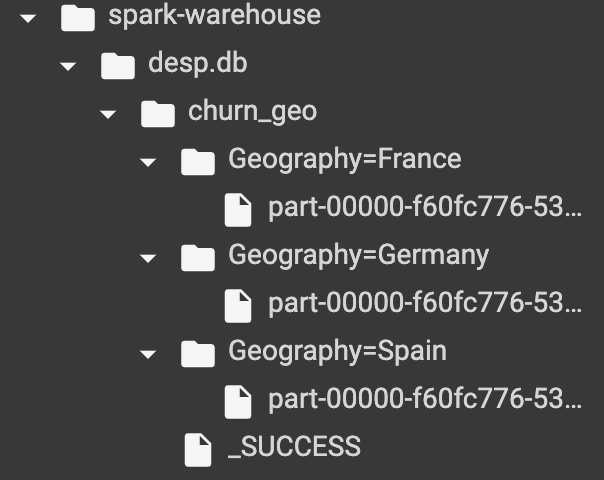

# Bucketing

In [14]:
churn.write.bucketBy(2, 'Geography').saveAsTable('churn_geo2')

In [15]:
spark.sql('SELECT * FROM churn_geo2').show()

+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure| Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+--------+-------------+---------+--------------+---------------+------+
|        619|   France|Female| 42|     2|       0|            1|        1|             1|       10134888|     1|
|        608|    Spain|Female| 41|     1| 8380786|            1|        0|             1|       11254258|     0|
|        502|   France|Female| 42|     8| 1596608|            3|        1|             0|       11393157|     1|
|        699|   France|Female| 39|     1|       0|            2|        0|             0|        9382663|     0|
|        850|    Spain|Female| 43|     2|12551082|            1|        1|             1|         790841|     0|
|        645|    Spain|  Male| 44|     8|11375578|            2|        1|             0|       

### Aqui nesse caso ele criou 2 arquivos com bucket a partir da coluna Geography

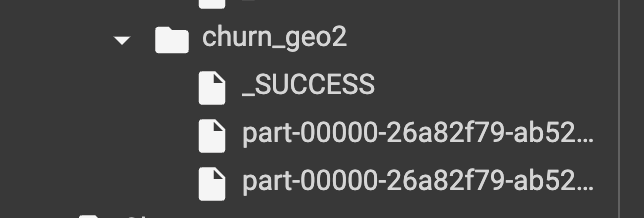